In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin


In [14]:
dados = pd.read_csv('https://raw.githubusercontent.com/ChernoBen/IAatividadeII/main/new_dataset', sep= ';')
'''removendo valores diferentes de obitos e cura'''
dados  = dados.drop(dados[dados['EVOLUCAO'] > 2 ].index)
dados  = dados.drop(dados[dados['EVOLUCAO'] < 1  ].index)
teste = dados.apply(preprocessing.LabelEncoder().fit_transform)
teste2 = teste[['NU_IDADE_N','EVOLUCAO']].values


In [15]:
dados


,Unnamed: 0,NU_IDADE_N,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,FATOR_RISC,CARDIOPATI,HEMATOLOGI,ASMA,DIABETES,NEUROLOGIC,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO
0,0,47,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
1,1,42,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,S,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0
2,2,49,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,...,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5,80,1.0,1.0,2.0,1.0,1.0,0.0,2.0,2.0,...,N,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
6,6,37,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945445,945445,73,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,S,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
945446,945446,75,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,S,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
945448,945448,59,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,S,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
945449,945449,73,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [17]:
#selecionando clusters de forma randomica
rng = np.random.RandomState(2)
i = rng.permutation(teste2.shape[0])[:2]
centers = teste2[i]
centers_his = []
labels_his = []
while True:
    labels = pairwise_distances_argmin(teste2, centers)
    new_centers = np.array([teste2[labels == i].mean(0) for i in range(2)])
    # 2c. Check for convergence
    '''verifica se todos os elementos do array são True e retorna True'''
    if np.all(centers == new_centers):
        break
    centers = new_centers
    centers_his.append(centers)
    labels_his.append(labels)
    

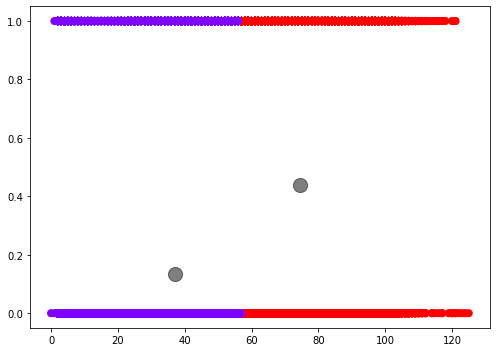

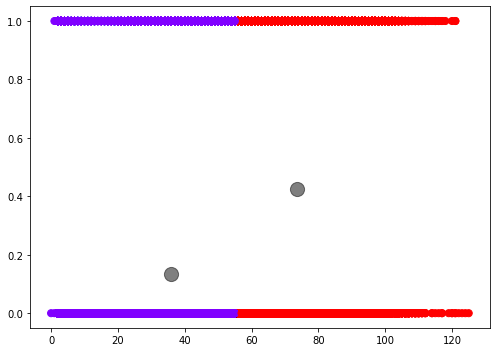

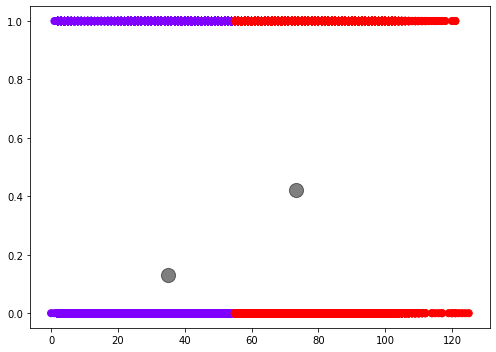

In [18]:
for i in range(len(centers_his)):
    #talves usar os centroides delcarados inicialmente
    centers = centers_his[i]
    labels = labels_his[i]
    fig = plt.figure(figsize=(7, 5))
    fig.set_tight_layout(True)
    plt.scatter(teste2[:, 0], teste2[:, 1], c=labels,
                s=50, cmap='rainbow');
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.savefig('kmeans_demo/{}.png'.format(i))